# Digit classification

Group: https://www.facebook.com/groups/ComputerVisionGroup/

Post: https://www.facebook.com/photo?fbid=3410066599083735&set=gm.2185222624955260

Created by: Sijmen van der Willik [[GitHub](https://github.com/sijmenw)]

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("./digits.jpg")

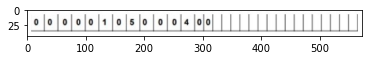

In [3]:
plt.imshow(img)

In [4]:
# sum twice:
#   sum over color and over rows
sums = np.sum(np.sum(img, axis=0), axis=1)

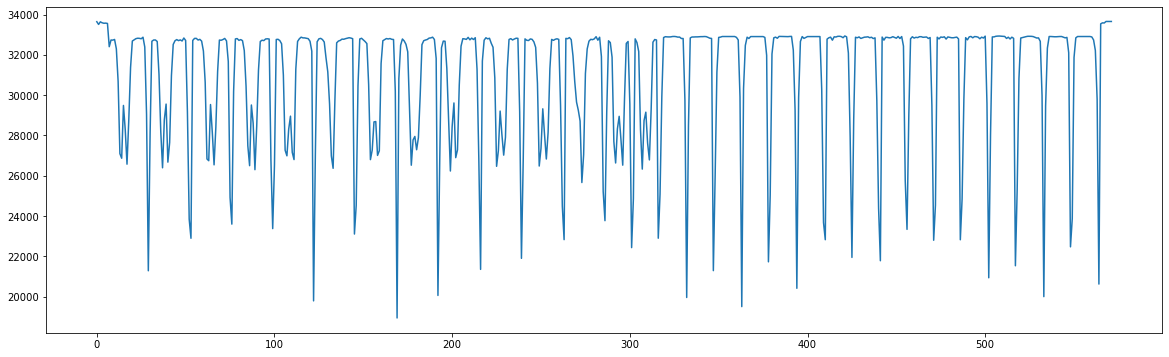

In [5]:
# plot sum
plt.figure(figsize=(20,6))
plt.plot(sums)

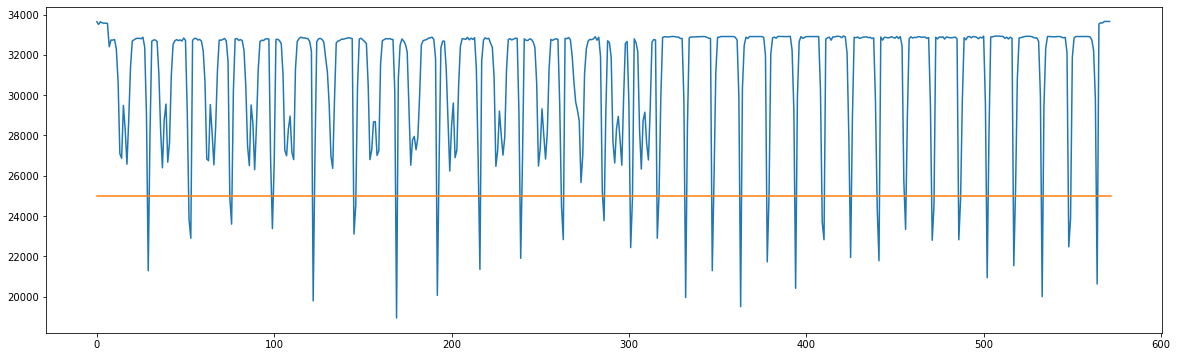

In [6]:
# Choose a suitable threshold, I've chosen 25000
threshold = 25000

plt.figure(figsize=(20,6))
plt.plot(sums)
plt.plot([0, sums.shape[0]], [threshold, threshold])

In [7]:
x_coords = np.where(sums < threshold)[0]
buffer = 4

# allow for a buffer around x_coords
buffer_x_coords = set()
for x in x_coords:
    for x_ in range(x-buffer, x+buffer+1):
        buffer_x_coords.add(x_)

buffer_x_coords = np.array(list(buffer_x_coords))

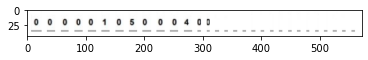

In [8]:
img[:, buffer_x_coords] = 255
plt.imshow(img)

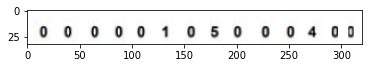

In [9]:
# Crop bottom lines from image
img = img[:32, :320]
plt.imshow(img)

## Tesseract OCR

In [10]:
import pytesseract

In [11]:
pytesseract.image_to_string(img)

'0000041050004 00\n\x0c'

## Multiple lines

Tesseract works better when there is more text available

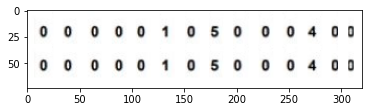

In [12]:
bottom_buffer = np.full((10, img.shape[1], 3), 255, dtype=np.uint8)
img_2 = np.vstack((img, img, bottom_buffer))
plt.imshow(img_2)

In [13]:
pytesseract.image_to_string(img_2)

'000001050004 00\n000001050004 00\n\x0c'

In [14]:
digits = pytesseract.image_to_string(img_2).splitlines()[0]
digits = [int(x) for x in digits if x in '0123456789']
digits

[0, 0, 0, 0, 0, 1, 0, 5, 0, 0, 0, 4, 0, 0]

# Conclusion

Perfect classification!